# Experiment 2 a larger trainning model

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#medical cost data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# apply one hot encoding
one_hot_dataset = pd.get_dummies(insurance)
one_hot_dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
X = one_hot_dataset.iloc[:, one_hot_dataset.columns != 'charges' ].values
y = one_hot_dataset.iloc[:, 3].values

In [6]:
#spliting data into testset and training set
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

len(X_train) + len(X_test)

1338

In [7]:
#build a nerual network
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
history = model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/100


2022-06-28 21:44:33.803260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 21:44:33.803777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 21:44:33.942694: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 21:44:34.458230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 2s 3ms/step - loss: 13317.1221 - mae: 13317.1240
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 12676.9863 - mae: 12676.9834
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 12376.2090 - mae: 12376.2090
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 12310.0039 - mae: 12310.0020
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 12230.8096 - mae: 12230.8066
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 12117.7871 - mae: 12117.7861
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 11936.0137 - mae: 11936.0156
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 11660.2324 - mae: 11660.2324
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 11248.9355 - mae: 11248.9336
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 10741.5488 - mae: 10

In [8]:
# Check the result of the model
model.evaluate(tf.expand_dims(X_test,axis=-1),y_test)

2022-06-28 21:44:49.102045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 8ms/step - loss: 8322.1738 - mae: 8322.1748


[8322.173828125, 8322.1748046875]

In [9]:
np.median(y_train), y_train.mean()

(9556.297050000001, 13379.68825002232)

In [28]:
# improve our model
#build a nerual network
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=8)
model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
history = model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=1000,callbacks=[callback])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

Text(0.5, 0, 'epochs')

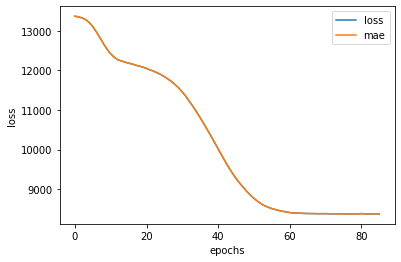

In [12]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Feature scaling (normalization and standardization)

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

# MinMaxScaler for converts all values to between 0 and 1 whilst preserving the original distribution
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# Transform tranning and test data with normalization the MinMaxScaler and OneHot
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
print(X.shape,y.shape)

(1338, 6) (1338,)


In [4]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [5]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [6]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [13]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
callback = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=20)
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = model.fit(X_train_normal,y_train, epochs=1000,callbacks=[callback])

Epoch 1/1000


2022-06-28 22:41:24.782886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 14ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/1000
34/34 [==============================] - 0s 5ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/1000
34/34 [==============================] - 0s 5ms/step - loss: 13312.0225 - mae: 13312.0225
Epoch 4/1000
34/34 [==============================] - 0s 4ms/step - loss: 13267.7920 - mae: 13267.7920
Epoch 5/1000
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/1000
34/34 [==============================] - 0s 4ms/step - loss: 13066.4531 - mae: 13066.4531
Epoch 7/1000
34/34 [==============================] - 0s 4ms/step - loss: 12888.1982 - mae: 12888.1982
Epoch 8/1000
34/34 [==============================] - 0s 4ms/step - loss: 12644.6592 - mae: 12644.6592
Epoch 9/1000
34/34 [==============================] - 0s 4ms/step - loss: 12325.5557 - mae: 12325.5557
Epoch 10/1000
34/34 [==============================] - 0s 4ms/step - loss: 11925.9766

<AxesSubplot:>

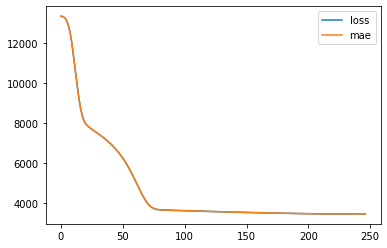

In [14]:
pd.DataFrame(history.history).plot()

In [17]:
model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3159.4695 - mae: 3159.4695


[3159.469482421875, 3159.469482421875]

9/9 [==============================] - 0s 3ms/step


/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kingchan818/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


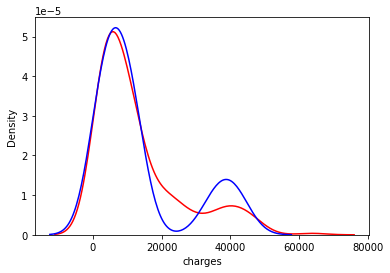

In [49]:
y_pred = model.predict(X_test_normal)
y_pred = y_pred.reshape(268)
import seaborn as sns

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()


(array([ 2., 18., 34., 43., 57., 53., 34., 19.,  4.,  4.]),
 array([-18616.25550755, -11809.90533108,  -5003.55515461,   1802.79502185,
          8609.14519832,  15415.49537479,  22221.84555125,  29028.19572772,
         35834.54590418,  42640.89608065,  49447.24625712]),
 <BarContainer object of 10 artists>)

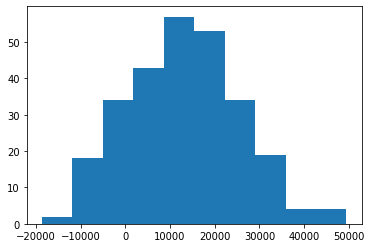

In [48]:
# show the normal distribution

plt.hist(np.random.normal(loc=y_test.mean(),scale=np.std(y_test), size=len(y_test)))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
